## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

As data science students seeking entry into the data science field post-graduation, we were interested in creating a robust regression model to predict salaries. Due to the increasing demand for professionals in this industry and its rapid growth, it is important, for employees and employers alike, that salaries are accurately predicted to ensure fair and competitive compensation.

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

Our aim was to develop a regression model to predict salaries in the data science field using information from different data science-related jobs all over the world. We created a regression model using different tuning techniques that can help ensure fair compensation for job seekers and aid organizations in attracting top talent by predicting salaries accurately. Our objective is to accurately estimate salaries, a continuous response variable, while optimizing Mean Absolute Error (MAE). 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Our dataset is from Kaggle and can be accessed through this link: AI & ML salaries.The dataset provides information on salaries for many job positions in the general data science field, such as Artificial Intelligence and Machine Learning engineers, among others. It captures changes from 2020 to 2023 and is updated weekly. In the form used in our project, the dataset has 4134 observations and 10 predictors. Some predictors include company size, experience level, employment type and remote ratio.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

Our main stakeholders for this project are current data scientists and machine learning practitioners along with job seekers in the data science space. For current data scientists, our predictions from salary data in the last three years can help them in making career decisions and negotiate salaries with their employers. For job seekers, our predictions can inform them so that they can appropriately evaluate their job offers and generally be aware of the future trajectory of specific subcategories in the Data Science & Machine Learning industry (compensation-wise), so that they can target their applications better. Other stakeholders for this project include the companies in the DS & ML space themselves, who can be informed through our predictions to effectively set competitive salary ranges. They can attract top talent by tailoring their compensation packages. Lastly, our insights are useful for universities and educational institutions interested in assessing the Return on Investment (ROI) of their data science programs and attract more candidates, as well as researchers, who can use our predictions to drive further research to assess industry growth in the data science field.

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

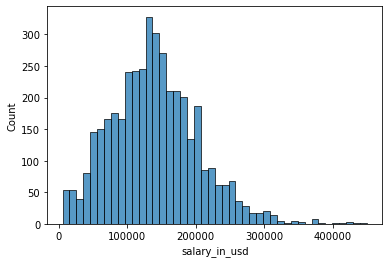

In [4]:
sns.histplot(data['salary_in_usd'])

One of the predictors, job_title (string) had over 100 unique values. This made it very difficult for us to extract relevant information based on this column. Therefore, we binned each job title into a broader category of job titles. This wasn’t straightforward and did involve a lot of manual work beyond just binning. Based on the field, title, expertise, type of work, and common sense we developed a dictionary to put the jobs into 10 categories. This allowed us to better leverage job titles in our model.


One variable we had to drop was salary. Since we decided to predict salary_in_usd because it was standardized, we had to drop salary because of how highly correlated it was. It didn’t make any sense to use it as a predictor since it had a correlation of 0.99 with the response and using it would have defeated the point of the project.

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

- No skew in target variable
- Each predictor was important and uncorrelated with the others. 
- We found other insights but did not incorporate them into our models

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We decided to create individual base models using MARS, Decision Trees (with cost-complexity pruning), Random Forests, Gradient Boosting, and XGBoost. We then ensemble these models using voting and stacking regressor methods to see whether this would help reduce the bias and/or variance of our model, while optimizing our metric: Mean Absolute Error (MAE). 
We decided to optimize MAE, to allow for a balanced approach, while reducing both overestimation and underestimation errors. Additionally, MAE is more practical than Root Mean Squared Error (RMSE) in real-world scenarios as it helps stakeholders interpret the model's predictions directly, since MAE is in the same units as the target variable. For our dataset, the standard deviation of the response variable (salary in USD) is $63,605. 
We anticipated that the column names for job titles would be a problem since there is no standardized job title for our data set. To solve this problem, we decided to bin the original job titles into 10 main categories to enable more generalized conclusions and improve the interpretability of our findings. While doing EDA, we also encountered the problem of evaluating the differences between using the work year column as a feature to predict the salary or to perform a time-series analysis, which would entail predicting salaries for future work years using historical data. Although a time-series analysis would provide insights into future salary trends, it would require more advanced modeling techniques beyond the scope of the class.
By choosing the work year as a feature, we can still capture important trends in our data while maintaining the feasibility of implementing our regression models within the confines of our current study. This approach enables us to develop accurate salary predictions without the additional complexities introduced by time-series modeling.


## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Mars
*By Christina Tzavara*

To develop my first MARS model, I began with a coarse grid search to optimize the max_degree hyperparameter. I started with a range of (1,5) in terms of values for max_degree. I used the MAE as a scoring metric to see where the max_degree minimizes it.
I utilized a visualization of the CV MAE against the max_degree to get informed on what value of max_degree minimizes the MAE: the optimal value for this hyperparameter with my initial search ended up being max_degree = 1. A default MARS model with max_degree = 1 yielded an MAE of $37,315.








Informed by the previous search, I decided to run a finer search for optimal max_degree, this time tuning this hyperparameter simultaneously with max_terms. I allowed for a range of (1,3) for the degree and (50,100,200) for max_terms. I wanted to be able to search across a sufficiently large range of models in terms of max_terms, to evaluate the performance of models with different complexities, while keeping the range reasonable enough to run simultaneously with the max_degree. The results of the second round of tuning was:

The final MARS model yielded a lower MAE of $36,813 and can be shown below:




### Decision Trees with Cost-Complexity Pruning
*By Sarah Abdulwahid*

To begin modeling with decision trees, I created an untuned Decision Tree Regressor model and got the max_depth = 44 and max_leaf_nodes = 632. The MAE for this model was $37,495.
Next, I used these outputs to determine hyper parameter ranges to consider for the tuning process using 5-fold cross validation. I considered the range [2,44] and [2, 632] and optimized for neg_mean_absolute_error. This search got me the optimal values of max_depth = 6 and max_leaf_nodes=42. 






Since the values were near the ends of the ranges I considered, I decided to perform a fine-grid search using 5-fold cross validation to improve the model performance. To narrow the range for hyperparameter tuning, I plotted max_depth and max_leaf_nodes against MAE (results from my first GridSearchCV). 

From these plots, I was able to narrow my range to [4,10] for max_leaves and [2,200] for max_leaf_nodes. 

From the results of the fine grid search I created a new Decision Tree Regressor with max_depth=6 and max_leaf_nodes = 42 as the parameters. This helped reduce the MAE to $36,561.
To help prevent overfitting, I decided to perform cost-complexity pruning. I created a decision tree regressor model without any restrictions on its growth and then computed the cost complexity pruning path on the training data to determine the potential alpha values for pruning. 
Then, I tuned the alpha hyperparameter by performing a grid search on the potential alpha values using 5-fold cross validation and optimizing for MAE. I got the optimal ccp_alpha = 8824077.621291757.
I used this value to create a new Decision Tree Regressor with this alpha as a parameter. This reduced the MAE to $36,258. 


### Bagged trees & Random forest
*By Catherine Tawadros*

Since I was particularly limited by my laptop’s runtime, I started with very vague searches and got increasingly more specific as time went on. I started with a very coarse search using RandomizedSearchCV and the following predictors:
parameters = {'max_depth': np.arange(5,50,7), "max_features": np.arange(2,10,2), 'max_leaf_nodes': np.arange(2000,4000,500), 'bootstrap':[True], 'ccp_alpha': np.arange(0.05, .15, 0.05)}
Receiving the following parameter output:
{'max_leaf_nodes': 2000, 'max_features': 4, 'max_depth': 33, 'ccp_alpha': 0.05, 'bootstrap': True}
Noticing that lower parameter values for max_leaf_nodes, max_features, and ccp_alpha were preferred, I ran the following RandomizedSearchCV:
parameters = {'max_depth': np.arange(5,50,7), "max_features": np.arange(2,8,1), 'max_leaf_nodes': np.arange(2000,2500,100), 'bootstrap':[True], 'ccp_alpha': np.arange(0.025, .1, 0.025)}
Receiving the following as a parameter output:
{'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 33, 'ccp_alpha': 0.07500000000000001, 'bootstrap': True}
I continued a few more iterations of these searches, particularly focused on tuning the bootstrapping, out-of-bag error, and criterion parameters, along with doing some finer tuning of the parameters above. As the model search progressed, I began to use GridSearchCV once I felt that I was down to sufficiently few combinations of parameters to consider every possibility within a reasonable amount of time.
Ultimately, I tuned 6 models and found that the 4th model performed best. I used the following parameters:
{'oob_score': True, 'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 36, 'ccp_alpha': 0.075, 'bootstrap': True, ‘criterion’: “neg_mean_absolute_error”, ‘n_estimators’: 100}
This achieved a final MAE of $35,292 on test data.


# GradientBoosting
*By Charles Bugayer*

I tuned many, many models, starting with broad ranges (coarse) and narrowing down to slimmer ones (fine). 
The base GradientBoosting Model resulted in an MAE of 36775.60.
For efficiency, I used RandomizedSearchCV with 100000 iterations, as a GridSearchCV would be totalling 9878400 fits with 5-fold cross validation.
Best gbr params: {'subsample': 1.0, 'n_estimators': 160, 'min_weight_fraction_leaf': 0, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'loss': 'huber', 'learning_rate': 0.095, 'criterion': 'squared_error'} Best gbr score: -36322.8451418078
After getting the initial best parameters, I used GridSearchCV to find the best parameters in a smaller range. After a couple of rounds of tuning, n_estimators moved to a higher value than the first round would have suggested. Because the value for min_samples_split was on the edge of the range, I increased the range.
Best gbr params: {'learning_rate': 0.095, 'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0, 'n_estimators': 189, 'subsample': 1.0} Best gbr score: -36216.57778386479
After this round of tuning, the MAE on train data only got worse, so I decided to stop there.


### XGBoost
*By Alex Olmeta*

Started by plotting the best values of an individual hyperparameters on a base model for a broad range
I used this insight as a starting point for my randomized search. I used randomized search and KFold cross validation with 3 folds because of runtime constraints

Broad search parameter values:
- ‘max_depth’: [4, 6, 8, 12, 15]
- ‘learning_rate’: [0.1, 0.05, 0.1]
- ‘reg_lambda’: [0, 1, 10, 100]
- ‘n_estimators’: [1000, 2000, 3000, 4000]
- ‘gamma’: [0, 10, 100, 1000, 1e6, 1e9]
- ‘subsample’: [0.5, 0.75, 1.0]

After this I ran a further RandomSearchCV with the same number of KFolds and iterations based on a new range of the hyperparameters the last one tended towards:

- ‘max_depth’: [7, 8, 9]
- ‘learning_rate’: [0.1, 0.25, 0.05, 0.1]
- ‘reg_lambda’: [0, 1, 10, 100]
- ‘n_estimators’: [1000, 1500, 2000, 2500]
- ‘gamma’: [0, 10, 100, 1000, 1e6, 1e9]
- ‘subsample’: [0.5, 0.625, 0.75, 0.875, 1.0]

After this random search I ran many manual searches. I noticed that the ideal number of n_estimators was at the high end of the last range and the learning rate needed to be low to prevent this from causing overfitting.
I also used the huber loss function when tuning to minimize the impact of outliers.

Final hyperparameters:
- ‘max_depth’: 7
- ‘learning_rate’: 0.016
- ‘Reg_lambda’: 100
- ‘N_estimators’: 2600
- ‘gamma’:10
- ‘subsample’: 0.68


## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

Our model is limited by the fact that we only have 4134 observations. This is a relatively small dataset, and we would have liked to have more observations to train our model on. We were able to predict salaries with a MAE of 35510, which we would have liked to decrease further, but we believe that this is the best we could do with the data we had. In addition, we suspect that predictors may not have been standardized across companies (for example, experience level “expert” did not mean the same across each company that provided data), which is discussed further in the conclusion section below.
If we had more time, we’d have looked for more insights through EDA and seen if any improved our model. One of the things that we wanted to do but didn’t have the time for is group the location by country GDP. We obviously predict that countries with a higher GDP would generally provide higher salaries. We also are curious in retrospect if we should have made a predictor that checks if the company location and employee residence are the same. We also could have improved our model with additional provided predictors such as employee age.


## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Sylvia Sherwood</td>
    <td>Lasso, Ridge & Catboost</td>
    <td>Data cleaning and EDA</td>    
    <td>Imputed missing values and visualized data</td>
  </tr>
  <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>MARS, AdaBoost & LightGBM</td>
    <td>Ensembling</td>    
    <td>Stacking ensembles and voting ensemble</td>
  </tr>
    <tr>
    <td>Fiona Fe</td>
    <td>Bagged trees & Random forest</td>
    <td>Variable selection</td>    
    <td>Variable selection based on feature importance</td>
  </tr>
    <tr>
    <td>Ryu Kimiko</td>
    <td>XGBoost</td>
    <td>Ensembling</td>    
    <td>Innovative ensemble & stacking ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.